<a href="https://colab.research.google.com/github/crater-creator/ObjectDetection/blob/main/FasterRCNN_mm_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
print(torch.__version__)

1.9.0+cu102


In [ ]:
!pip install mmcv-full

     |████████████████████████████████| 317kB 8.2MB/s 
     |████████████████████████████████| 194kB 33.9MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.8-cp37-cp37m-linux_x86_64.whl size=29175319 sha256=46c1d52768bab9762ac8e7c4a2c54e8b22ff98d082480c04b874146fbe4acacd
  Stored in directory: /root/.cache/pip/wheels/5a/0d/c3/627bb7a31df052473f9edd2812702d4a0b2e302cb6932c9a91
Successfully built mmcv-full


In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

In [ ]:
from mmdet.apis import init_detector, inference_detector
import mmcv

In [ ]:
!cd mmdetection; mkdir checkpoints

In [ ]:
!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2021-06-30 06:41:40--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.78
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M  13.1MB/s    in 12s     

2021-06-30 06:41:53 (13.2 MB/s) - ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [ ]:
!ls -lia /content/mmdetection/checkpoints

total 163376
4219259 drwxr-xr-x  2 root root      4096 Jun 30 06:41 .
4214765 drwxr-xr-x 18 root root      4096 Jun 30 06:41 ..
4216074 -rw-r--r--  1 root root 167287506 Aug 28  2020 faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [ ]:
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [ ]:
from mmdet.apis import init_detector, inference_detector

model = init_detector(config_file, checkpoint_file, device='cuda:0')


/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


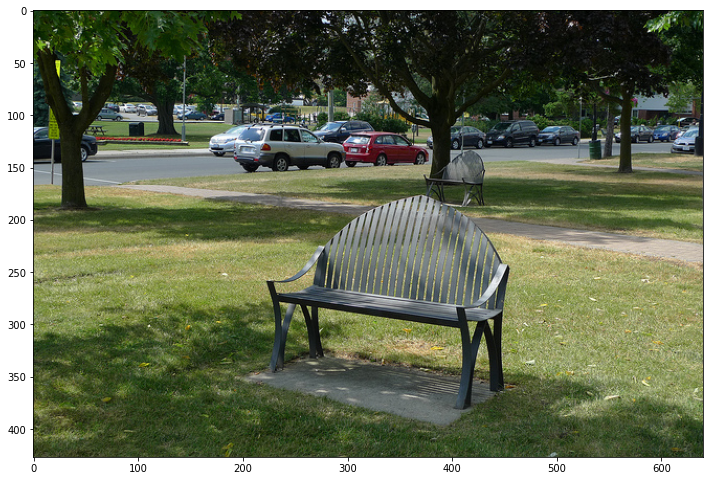

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = '/content/mmdetection/demo/demo.jpg'
img_arr = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.imshow(img_arr)

In [ ]:
results = inference_detector(model, img)

/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/pyt

In [ ]:
type(results), len(results)

(list, 80)

In [ ]:
results

In [ ]:
results[0]

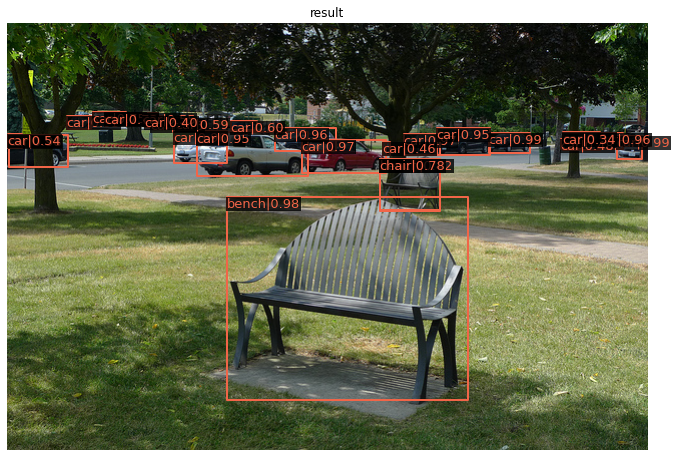

In [ ]:
from mmdet.apis import show_result_pyplot

show_result_pyplot(model, img, results)

In [ ]:
model.__dict__

In [ ]:
print(model.cfg.pretty_text)

/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


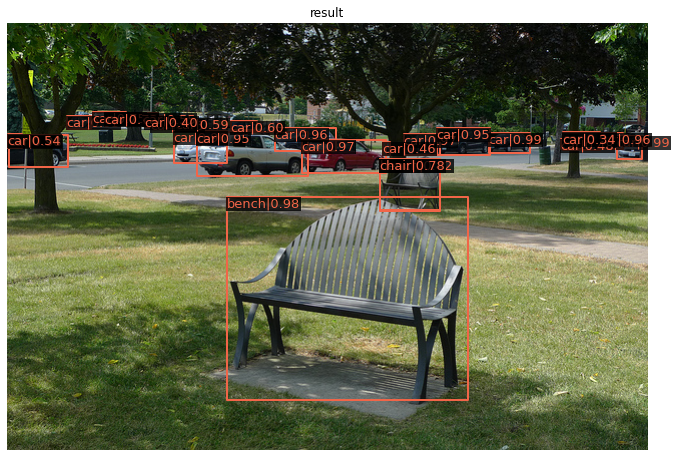

In [ ]:
import cv2

img_arr = cv2.imread('/content/mmdetection/demo/demo.jpg')
results = inference_detector(model, img_arr)

show_result_pyplot(model, img_arr, results)

In [ ]:
# 0부터 순차적으로 클래스 매핑된 label 적용. 
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [ ]:
import numpy as np

def get_detected_img(model, img_array, score_threshold=0.3, is_print=True):
  draw_img = img_array.copy()
  bbox_color = (0,255,0)
  text_color = (0,0,255)

  results = inference_detector(model, img_array)

  for result_ind, result in enumerate(results):
    if len(result) == 0:
      continue
    result_filtered = result[np.where(result[:, 4] > score_threshold)]

    for i in range(len(result_filtered)):
      # 좌상단, 우하단 좌표 추출. 
      left = int(result_filtered[i, 0])
      top = int(result_filtered[i, 1])
      right = int(result_filtered[i, 2])
      bottom = int(result_filtered[i, 3])
      caption = "{}: {:.4f}".format(labels_to_names_seq[result_ind], result_filtered[i, 4])
      cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness=2)
      cv2.putText(draw_img, caption, (int(left), int(top - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.37, text_color, 1)
      if is_print:
        print(caption)
        
  return draw_img


/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.14.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


car: 0.9888
car: 0.9872
car: 0.9832
car: 0.9713
car: 0.9678
car: 0.9594
car: 0.9593
car: 0.9568
car: 0.9510
car: 0.9458
car: 0.9440
car: 0.9331
car: 0.8663
car: 0.8268
car: 0.7535
car: 0.7166
car: 0.6008
car: 0.5920
car: 0.5540
car: 0.5435
car: 0.4768
car: 0.4612
car: 0.4010
car: 0.3439
bench: 0.9778
bench: 0.4170
chair: 0.7779


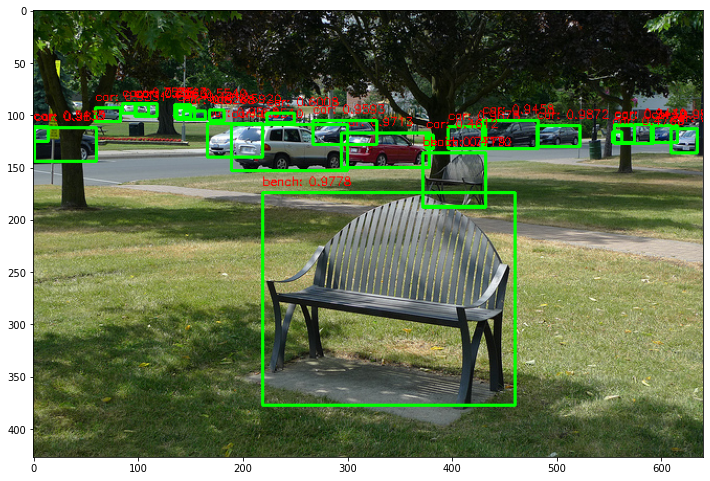

In [ ]:
import matplotlib.pyplot as plt

img_arr = cv2.imread('/content/mmdetection/demo/demo.jpg')
detected_img = get_detected_img(model, img_arr,  score_threshold=0.3, is_print=True)
# detect 입력된 이미지는 bgr임. 이를 최종 출력시 rgb로 변환 
detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(detected_img)

In [ ]:
!mkdir data

In [ ]:
!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
!ls -lia /content/data/beatles01.jpg

--2021-06-30 07:51:43--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.02s   

2021-06-30 07:51:43 (17.6 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]

4216075 -rw-r--r-- 1 root root 383118 Jun 30 07:51 /content/data/beatles01.jpg


In [ ]:
!wget -O /content/data/John_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

In [ ]:
from mmdet.apis import init_detector, inference_detector
import mmcv

config_file = "/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py"
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
model = init_detector(config_file, checkpoint_file, device="cuda:0")

In [ ]:
import cv2
import numpy as np

def get_detected_img(model, img_array, score_threshold=0.3, is_print=True):
  draw_img = img_array.copy()
  bbox_color = (0,255,0)
  text_color = (0,0,255)

  results = inference_detector(model, img_array)

  for results_ind, results in enumerate(results):
    if len(result) == 0;
      continue
    result_filtered = result[np.where(result[:.4]>score_threshold)]

    for i in range(len(result_filtered)):
      left = int(result_filtered[i,0])
      top = int(result_filtered[i,1])
      right = int(result_filtered[i,2])
      bottom = int(result_filtered[i,3])
      caption = "{}:{:.4f}".format(labels_to_names_seq[result_ind], result_filtered[i, 4])
      cv2.rectangle(draw_img, (left, top),(right,bottom), color=bbox_color, thickness=2)
      cv2.putText(draw_img, caption, (int(left),int(top-7)), cv2.FONT_HERSHEY_SIMPLEX,0.37,text_color,1)
      if is_print:
        print(caption)
  return draw_img

In [ ]:
import time

def do_detected_video(model, input_path, output_path, score_threshold, do_print=True):
  cap = cv2.VideoCapture(input_path)

  codec = cv2.VideoWriter_fourcc(*"XVID")
  vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
  vid_fps = cap.get(cv2.CAP_PROP_FPS)

  vid_writer = cv2.VideoWriter(ouput_path, codec, vid_fps, vid_size)
  frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  print('총 Frame 갯수:', frame_cnt)
  btime = time.time()

  while True:
    hasFrmae, img_frame = cap.read()
    if not hasFrmae:
      break
    img_frame = get_detected_img(model, img_frame, score_threshold=score_threshold, is_print = False)
    if do_print:
      print('frame별 detection 수행 시간:', round(time.time() - stime, 4))
    vid_writer.write(img_frame)
  vid_writer.release()
  cap.release()
  print('최종 detection 완료 수행 시간:', round(time.time() - btime, 4))


In [ ]:
do_detected_video(model, '/content/data/John_Wick_small.mp4', '/content/data/John_Wick_small_out2.mp4', score_threshold=0.4, do_print=True)